# Introduction

**Select Subset of Bug Reports for Empirical Study**

For the empirical study, made for the creation of the oracle matrix by volunteers, we make a selection of bug reports to filter the most relevant for our analysis and improve the power and improve our conclusions about the studied subject.

# Import Libraries

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns

from IPython.display import display
import matplotlib.pyplot as plt

from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

%matplotlib inline

# Load Datasets

In [2]:
bugreports_final = fd.read_orig_bugreports_df()
features_df = fd.read_orig_features_df()

OrigBugReports.shape: (35336, 18)
OrigFeatures.shape: (21, 6)


# EDA - Bug Reports

In [3]:
bugreports_final.head()

,Bug_Number,Summary,Platform,Component,Version,Creation_Time,Whiteboard,QA_Whiteboard,First_Comment_Text,First_Comment_Creation_Time,Status,Product,Priority,Resolution,Severity,Is_Confirmed,br_name,br_desc
0,506297,Livemarks with null site/feed uris cause sync ...,All,Sync,unspecified,2009-07-24T17:08:43Z,NaN,NaN,2009-07-24 09:54:28 FaultTolerance D...,2009-07-24T17:08:43Z,RESOLVED,Firefox,--,FIXED,normal,True,BR_506297_SRC,506297 Livemarks with null site/feed uris caus...
1,506338,Enhance Crash Recovery to better help the user,All,Session Restore,Trunk,2009-07-24T19:17:21Z,[crashkill][crashkill-metrics],NaN,When our users crash they are pretty much in t...,2009-07-24T19:17:21Z,NEW,Firefox,--,NaN,enhancement,True,BR_506338_SRC,506338 Enhance Crash Recovery to better help t...
2,506507,Dragging multiple bookmarks in the bookmarks s...,x86,Bookmarks & History,Trunk,2009-07-26T06:16:02Z,NaN,NaN,User-Agent: Mozilla/5.0 (Windows; U; Win...,2009-07-26T06:16:02Z,RESOLVED,Firefox,--,WORKSFORME,normal,True,BR_506507_SRC,506507 Dragging multiple bookmarks in the book...
3,506550,Unreliable Back Button navigating nytimes.com,x86,Extension Compatibility,3.5 Branch,2009-07-26T16:12:10Z,[caused by adblock plus][platform-rel-NYTimes],NaN,User-Agent: Mozilla/5.0 (Windows; U; Win...,2009-07-26T16:12:10Z,RESOLVED,Firefox,--,FIXED,normal,False,BR_506550_SRC,506550 Unreliable Back Button navigating nytim...
4,506575,ALT + F4 when dropdown of autocomplete is open...,x86,Address Bar,3.5 Branch,2009-07-26T20:14:54Z,NaN,NaN,Pressing ALT + F4 when the autocomplete dropdo...,2009-07-26T20:14:54Z,NEW,Firefox,P5,NaN,normal,True,BR_506575_SRC,506575 ALT + F4 when dropdown of autocomplete ...


In [4]:
bugreports_final.Resolution.value_counts()

FIXED         10669
DUPLICATE      5540
INCOMPLETE     3415
WORKSFORME     3008
INVALID        2826
WONTFIX        2419
INACTIVE        448
MOVED             1
Name: Resolution, dtype: int64

In [5]:
bugreports_final.Status.value_counts()

RESOLVED       24665
NEW             5349
VERIFIED        3661
UNCONFIRMED     1086
REOPENED         222
ASSIGNED         134
Name: Status, dtype: int64

In [6]:
bugreports_final.Priority.value_counts()

--    23138
P3     4070
P1     3702
P5     2465
P2     1336
P4      406
Name: Priority, dtype: int64

In [7]:
bugreports_final.Severity.value_counts()

normal         30613
enhancement     1831
critical         883
major            842
minor            615
trivial          270
blocker           63
Name: Severity, dtype: int64

# Bug Reports Selection

In [8]:
brs_versions = ['48 Branch', '49 Branch', '50 Branch', '51 Branch']
brs_status = ['RESOLVED','VERIFIED']
brs_priority = ['P1', 'P2', 'P3']
brs_resolutions = ['FIXED']
brs_severities = ['major', 'normal', 'blocker', 'critical']
brs_isconfirmed = [True]
selected_bugs = bugreports_final[(bugreports_final.Version.isin(brs_versions)) &
                                 (bugreports_final.Status.isin(brs_status)) &
                                 (bugreports_final.Priority.isin(brs_priority)) &
                                 (bugreports_final.Resolution.isin(brs_resolutions)) &
                                 (bugreports_final.Severity.isin(brs_severities)) &
                                 (bugreports_final.Is_Confirmed.isin(brs_isconfirmed))
                                ]
print(selected_bugs.shape)

(93, 18)


## Bug Reports Selection after Complementary Data (01-02/06/2016)

In [9]:
brs_ids = [ '882753',  '945665', '1127927', '1154922', '1223550', '1265967', '1266270',
       '1271395', '1271766', '1271774', '1274459', '1274712', '1276070', '1276152',
       '1276447', '1276656', '1276818', '1276884', '1276966', '1277114', '1277151',
       '1277257']
brs_versions = ['48 Branch', '49 Branch', '50 Branch', '51 Branch']
brs_status = ['RESOLVED','VERIFIED']
brs_priority = ['P1', 'P2', 'P3']
brs_resolutions = ['FIXED']
brs_severities = ['major', 'normal', 'blocker', 'critical']
brs_isconfirmed = [True]
selected_bugs_2 = bugreports_final[(bugreports_final.Bug_Number.isin(brs_ids)) &
                                 (bugreports_final.Version.isin(brs_versions)) &
                                 (bugreports_final.Status.isin(brs_status)) &
                                 (bugreports_final.Priority.isin(brs_priority)) &
                                 (bugreports_final.Resolution.isin(brs_resolutions)) &
                                 (bugreports_final.Severity.isin(brs_severities)) &
                                 (bugreports_final.Is_Confirmed.isin(brs_isconfirmed))
                                ]
print(selected_bugs_2.shape)

(0, 18)


**There is no NEW bug reports for analysis of the volunteers so any tasks are created from this data!!**

# Bug Report Selection Analysis

## Distribution of Length of First Comment

(array([26., 26., 20., 13.,  2.,  2.,  2.,  0.,  1.,  1.]),
 array([  78. ,  344.9,  611.8,  878.7, 1145.6, 1412.5, 1679.4, 1946.3,
        2213.2, 2480.1, 2747. ]),
 <a list of 10 Patch objects>)

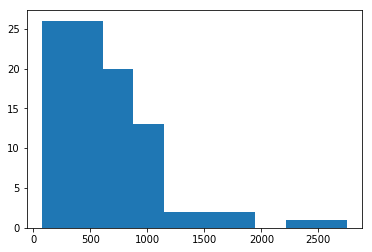

In [10]:
plt.hist(selected_bugs.First_Comment_Text.apply(lambda x : len(x)))

## Distribution of Versions

51 Branch    37
50 Branch    20
48 Branch    19
49 Branch    17
Name: Version, dtype: int64


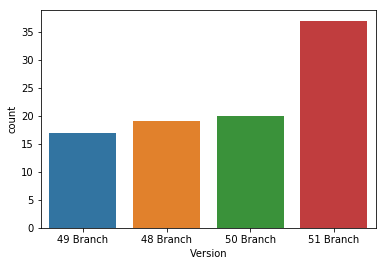

In [11]:
print(selected_bugs.Version.value_counts())
display(sns.countplot(selected_bugs.Version))

## Distribution of Status

VERIFIED    54
RESOLVED    39
Name: Status, dtype: int64


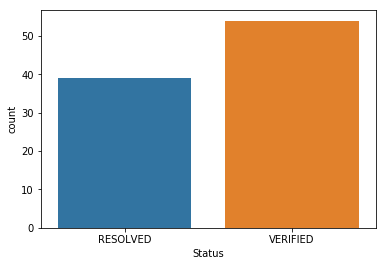

In [12]:
print(selected_bugs.Status.value_counts())
display(sns.countplot(selected_bugs.Status))

## Distribution of Priorities

P1    46
P2    28
P3    19
Name: Priority, dtype: int64


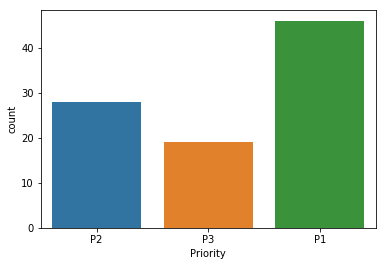

In [13]:
print(selected_bugs.Priority.value_counts())
display(sns.countplot(selected_bugs.Priority))

## Distribution of Resolutions

FIXED    93
Name: Resolution, dtype: int64


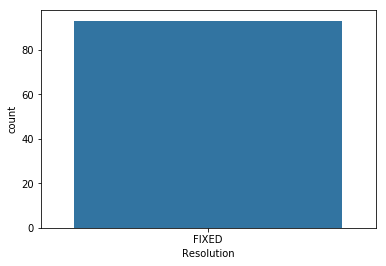

In [14]:
print(selected_bugs.Resolution.value_counts())
display(sns.countplot(selected_bugs.Resolution))

## Distribution of Severities

normal    91
major      2
Name: Severity, dtype: int64


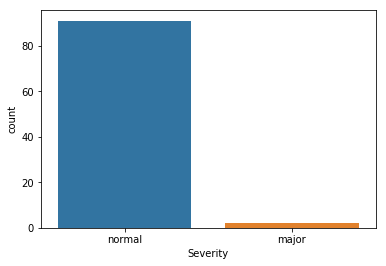

In [15]:
print(selected_bugs.Severity.value_counts())
display(sns.countplot(selected_bugs.Severity))

## Distribution of IsConfirmed

True    93
Name: Is_Confirmed, dtype: int64


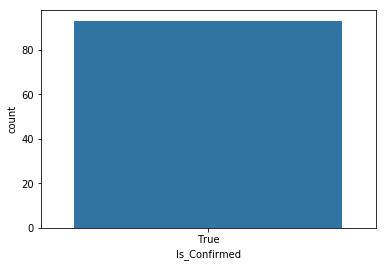

In [16]:
print(selected_bugs.Is_Confirmed.value_counts())
display(sns.countplot(selected_bugs.Is_Confirmed))

# Selected Bug Reports Saving Dataframe

In [20]:
print(selected_bugs.shape)
selected_bugs.to_csv('../data/mozilla_firefox_v2/firefoxDataset/docs_english/BR/selected_bugreports_final.csv', index=False)

(93, 18)


# Features Preprocessing

In [18]:
features_df['feat_name'] = features_df['Feature_Shortname']
features_df['feat_desc'] = features_df.apply(lambda row : ' '.join([str(el) for el in row]), axis=1)
features_df.head()

,Feature_Number,Feature_Shortname,Firefox_Version,Firefox_Feature,Feature_Description,Reference,feat_name,feat_desc
0,1,new_awesome_bar,48 Branch + 50 Branch,New Awesome Bar,The Firefox address bar displays a page's web ...,https://support.mozilla.org/en-US/kb/awesome-b...,new_awesome_bar,1 new_awesome_bar 48 Branch + 50 Branch New Aw...
1,2,windows_child_mode,48 Branch,Windows Child Mode,Child mode is a feature of Windows that allows...,https://wiki.mozilla.org/QA/Windows_Child_Mode,windows_child_mode,2 windows_child_mode 48 Branch Windows Child M...
2,3,apz_async_scrolling,48 Branch,APZ - Async Scrolling,The Async Pan/Zoom module (APZ) is a platform ...,https://wiki.mozilla.org/Platform/GFX/APZ,apz_async_scrolling,3 apz_async_scrolling 48 Branch APZ - Async Sc...
3,4,browser_customization,49 Branch,Browser Customization,. Install and Customize Firefox Themes. \n. Cu...,https://support.mozilla.org/en-US/kb/use-theme...,browser_customization,4 browser_customization 49 Branch Browser Cust...
4,5,pdf_viewer,49 Branch,PDF Viewer,"Zoom in, Zoom out, Print and Save PDF Files.",https://support.mozilla.org/en-US/kb/view-pdf-...,pdf_viewer,"5 pdf_viewer 49 Branch PDF Viewer Zoom in, Zoo..."


# Save Final Features Dataframe

In [19]:
features_df.to_csv('../data/mozilla_firefox_v2/firefoxDataset/docs_english/Features/features_final.csv', index=False)